Hello   

In [1]:
!pip install tap-py


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install -U kaleido


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as pltly
import plotly.express as px
import seaborn as sns
import scipy.stats as stats
import kaleido



In [ ]:
SAVE_HTML = False
SAVE_FIGS = False

In [4]:
! git clone https://github.com/emmadefrang/MGT-499


fatal: destination path 'MGT-499' already exists and is not an empty directory.


In [8]:
#df = pd.read_csv(r"/content/MGT-499/SOC-project/SOC perennials DATABASE.csv",
                #skiprows=1,
                 #encoding = 'cp1252')


df = pd.read_csv (r"C:\Users\defrang\MGT_499\SOC-project\df_cleaned.csv")
df.head()

,Unnamed: 0,ID,IDstudy,plotID,country,region,climate,bedrock,soil_type,TYPE_CHANGE,...,soil_to_cm_previous,depth_midpoint_previous,Bulkdensity_previous,%clay_previous,%silt_previous,%sand_previous,ph_previous,SOC_Mg_ha_previous,SOC_change,SOC_percentage_change
0,0,1,1,1,Brazil,SaoPaulo,Tropical,Sandstone,Ferralsols,LUC,...,30.000000,20.000000,1.450000,21.900000,9.333333,68.766667,NaN,29.446667,8.060000,-27.371519
1,1,5,1,2,Brazil,SaoPaulo,Tropical,Sandstone,Luvisol,LUC,...,30.000000,20.000000,1.246667,46.800000,10.400000,42.766667,NaN,32.830000,8.283333,-25.230988
2,2,9,1,3,Brazil,SaoPaulo,Tropical,Granite,Ferralsols,LUC,...,30.000000,20.000000,1.416667,30.366667,8.000000,62.566667,NaN,31.370000,0.463333,-1.476995
3,3,13,1,4,Brazil,SaoPaulo,Tropical,Sandstone,Luvisol,LUC,...,30.000000,20.000000,1.396667,11.500000,6.866667,81.633333,NaN,25.270000,5.310000,-21.013059
4,4,26,4,8,New_Zeland,Bay_of_Plenty,Temperate,Volcanic,Mollic_Andosol,LUC,...,4.163636,3.754545,1.203636,NaN,NaN,NaN,5.72,90.872727,-0.009091,0.010004


In [9]:
#Check the data types
df.dtypes

df.describe()

#List all column names
df.columns


Index(['Unnamed: 0', 'ID', 'IDstudy', 'plotID', 'country', 'region', 'climate',
       'bedrock', 'soil_type', 'TYPE_CHANGE', 'CROP_current', 'CROP_type',
       'current_land_use*', 'LUC_this_study', 'previous_land_use*',
       'NUM_DEPTH', 'N_measured_current.1', 'temperature_Celsiul',
       'precipitation_mm', 'Latitud', 'Longitud', 'years_since_luc',
       'year_measure', 'soil_from_cm_current', 'soil_to_cm_current',
       'depth_midpoint_current', 'bulk_density_Mg_m3_current', '%clay_current',
       '%silt_current', '%sand_current', 'ph_current', 'SOC_Mg_ha_current',
       'sd_SOC_Mgha_current', 'soil_from_cm_previous', 'soil_to_cm_previous',
       'depth_midpoint_previous', 'Bulkdensity_previous', '%clay_previous',
       '%silt_previous', '%sand_previous', 'ph_previous', 'SOC_Mg_ha_previous',
       'SOC_change', 'SOC_percentage_change'],
      dtype='object')

We will now pivot the df so that there is a binary column called Period with a value of either 0 (previous) or 1 (current). 

In [70]:
constant_vars = [
    'ID', 'IDstudy', 'plotID', 'country', 'region', 'climate',
    'bedrock', 'soil_type', 'temperature_Celsiul',
    'precipitation_mm', 'Latitud', 'Longitud']

current_vars = [ 
    'year_measure', 'TYPE_CHANGE', 'years_since_luc', 'CROP_current', 'CROP_type', 'current_land_use*', 
    'N_measured_current.1',
    'soil_from_cm_current', 'soil_to_cm_current', 'depth_midpoint_current',
    'bulk_density_Mg_m3_current', '%clay_current', '%silt_current',
    '%sand_current', 'ph_current', 'SOC_Mg_ha_current'
]

previous_vars = [
    'previous_land_use*', 'soil_from_cm_previous', 'soil_to_cm_previous', 'depth_midpoint_previous',
    'Bulkdensity_previous', '%clay_previous', '%silt_previous',
    '%sand_previous', 'ph_previous', 'SOC_Mg_ha_previous'
]


In [71]:
#Create separate dataframes for current and previous SOC measurements
df_current = df[constant_vars + current_vars]

df_previous = df[constant_vars + previous_vars]

#Check the first few rows of the current SOC dataframe
df_current.head()

#Check the first few rows of the previous SOC dataframe
df_previous.head()


,ID,IDstudy,plotID,country,region,climate,bedrock,soil_type,temperature_Celsiul,precipitation_mm,...,previous_land_use*,soil_from_cm_previous,soil_to_cm_previous,depth_midpoint_previous,Bulkdensity_previous,%clay_previous,%silt_previous,%sand_previous,ph_previous,SOC_Mg_ha_previous
0,1,1,1,Brazil,SaoPaulo,Tropical,Sandstone,Ferralsols,21.0,1500.0,...,perennial_food,10.000000,30.000000,20.000000,1.450000,21.900000,9.333333,68.766667,NaN,29.446667
1,5,1,2,Brazil,SaoPaulo,Tropical,Sandstone,Luvisol,21.0,1500.0,...,perennial_food,10.000000,30.000000,20.000000,1.246667,46.800000,10.400000,42.766667,NaN,32.830000
2,9,1,3,Brazil,SaoPaulo,Tropical,Granite,Ferralsols,21.0,1500.0,...,annual_crop,10.000000,30.000000,20.000000,1.416667,30.366667,8.000000,62.566667,NaN,31.370000
3,13,1,4,Brazil,SaoPaulo,Tropical,Sandstone,Luvisol,21.0,1500.0,...,grassland,10.000000,30.000000,20.000000,1.396667,11.500000,6.866667,81.633333,NaN,25.270000
4,26,4,8,New_Zeland,Bay_of_Plenty,Temperate,Volcanic,Mollic_Andosol,14.5,138.0,...,grassland,3.345455,4.163636,3.754545,1.203636,NaN,NaN,NaN,5.72,90.872727


In [72]:
df_current.columns


Index(['ID', 'IDstudy', 'plotID', 'country', 'region', 'climate', 'bedrock',
       'soil_type', 'temperature_Celsiul', 'precipitation_mm', 'Latitud',
       'Longitud', 'year_measure', 'TYPE_CHANGE', 'years_since_luc',
       'CROP_current', 'CROP_type', 'current_land_use*',
       'N_measured_current.1', 'soil_from_cm_current', 'soil_to_cm_current',
       'depth_midpoint_current', 'bulk_density_Mg_m3_current', '%clay_current',
       '%silt_current', '%sand_current', 'ph_current', 'SOC_Mg_ha_current'],
      dtype='object')

In [73]:
df_previous.columns

Index(['ID', 'IDstudy', 'plotID', 'country', 'region', 'climate', 'bedrock',
       'soil_type', 'temperature_Celsiul', 'precipitation_mm', 'Latitud',
       'Longitud', 'previous_land_use*', 'soil_from_cm_previous',
       'soil_to_cm_previous', 'depth_midpoint_previous',
       'Bulkdensity_previous', '%clay_previous', '%silt_previous',
       '%sand_previous', 'ph_previous', 'SOC_Mg_ha_previous'],
      dtype='object')

In [74]:
# Rename columns for clarity
df_current.columns = ['ID', 'IDstudy', 'plotID', 'country', 'region', 'climate', 'bedrock', 'soil_type', 
                       'temperature', 'precipitation_mm', 'Latitud', 'Longitud', 'year_measure', 
                        'TYPE_CHANGE', 'years_since_luc', 'CROP_current', 'CROP_type', 'land_use',
                        'N_measured', 'soil_from_cm', 'soil_to_cm', 'depth_midpoint', 'bulk_density_Mg_m3',
                        '%clay', '%silt', '%sand', 'ph', 'SOC_Mg_ha']
                           
                      
df_previous.columns = ['ID', 'IDstudy', 'plotID', 'country', 'region', 'climate', 'bedrock', 'soil_type', 
                       'temperature', 'precipitation_mm', 'Latitud', 'Longitud', 'land_use',
                        'soil_from_cm', 'soil_to_cm', 'depth_midpoint', 'bulk_density_Mg_m3', 
                        '%clay','%silt', '%sand', 'ph', 'SOC_Mg_ha',]                      
                       

# Add a column to indicate current vs previous
df_current ['Period'] = '1'
df_previous ['Period'] = '0'

# Concatenate the dataframes
combined_df = pd.concat([df_current, df_previous])

# Drop rows with NaN SOC_Mg_ha
combined_df.dropna(subset=['SOC_Mg_ha'], inplace=True)


print(combined_df.head())

   ID  IDstudy  plotID     country         region    climate    bedrock  \
0   1        1       1      Brazil       SaoPaulo   Tropical  Sandstone   
1   5        1       2      Brazil       SaoPaulo   Tropical  Sandstone   
2   9        1       3      Brazil       SaoPaulo   Tropical    Granite   
3  13        1       4      Brazil       SaoPaulo   Tropical  Sandstone   
4  26        4       8  New_Zeland  Bay_of_Plenty  Temperate   Volcanic   

        soil_type  temperature  precipitation_mm  ...  soil_from_cm  \
0      Ferralsols         21.0            1500.0  ...     10.000000   
1         Luvisol         21.0            1500.0  ...     10.000000   
2      Ferralsols         21.0            1500.0  ...     10.000000   
3         Luvisol         21.0            1500.0  ...     10.000000   
4  Mollic_Andosol         14.5             138.0  ...      3.345455   

   soil_to_cm  depth_midpoint bulk_density_Mg_m3      %clay      %silt  \
0   30.000000       20.000000           1.396667

C:\Users\defrang\AppData\Local\Temp\ipykernel_25444\2965850342.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current ['Period'] = '1'
C:\Users\defrang\AppData\Local\Temp\ipykernel_25444\2965850342.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_previous ['Period'] = '0'


In [91]:
#Make a new dataframe called df_luc that replaces 'bioenergy', 'food', 'bioproduct', and 'livestockfood' with 'perrenial_crop'

df_luc_clean = combined_df.copy()

df_luc_clean['land_use'] = df_luc_clean['land_use'].apply(lambda x: 'perennial_crop' if x in ['bioenergy', 'food', 'bioproduct', 'livestockfood'] else x)


df_luc_clean['land_use'] = df_luc_clean.apply(lambda x: 'perennial_' + x['CROP_type'] if x['land_use'] == 'perennial_crop' else x['land_use'], axis=1)

#Remove perennial_food from the dataset because we don't know the crop type so we don't know how to compare LUC where it was perennial_crop before and a different perennial crop now

df_luc_clean = df_luc_clean[df_luc_clean['land_use'] != 'perennial_food']

#Check the unique values of land_use
df_luc_clean['land_use'].unique()

#Print all the rows where land_use is nan
df_luc_clean[df_luc_clean['land_use'].isnull()]


,ID,IDstudy,plotID,country,region,climate,bedrock,soil_type,temperature,precipitation_mm,...,soil_from_cm,soil_to_cm,depth_midpoint,bulk_density_Mg_m3,%clay,%silt,%sand,ph,SOC_Mg_ha,Period
15,112,8,25,Germany,Kenner_Flur,Temperate,NaN,Haplic_Cambisols_Fluvisols_stagnic_Luvisols,9.3,719.0,...,13.333333,21.666667,17.5,NaN,13.433333,26.1,60.466667,5.746667,8.171667,0
16,120,8,26,Germany,Kenner_Flur,Temperate,NaN,Haplic_Cambisols_Fluvisols_stagnic_Luvisols,9.3,719.0,...,13.333333,21.666667,17.5,NaN,13.433333,26.1,60.466667,5.746667,8.171667,0
17,128,8,27,Germany,Kenner_Flur,Temperate,NaN,Haplic_Cambisols_Fluvisols_stagnic_Luvisols,9.3,719.0,...,13.333333,21.666667,17.5,NaN,13.433333,26.1,60.466667,5.746667,8.171667,0
18,136,8,28,Germany,Kenner_Flur,Temperate,NaN,Haplic_Cambisols_Fluvisols_stagnic_Luvisols,9.3,719.0,...,13.333333,21.666667,17.5,NaN,13.433333,26.1,60.466667,5.746667,8.171667,0
19,144,8,29,Germany,Kenner_Flur,Temperate,NaN,Haplic_Cambisols_Fluvisols_stagnic_Luvisols,9.3,719.0,...,13.333333,21.666667,17.5,NaN,13.433333,26.1,60.466667,5.746667,8.171667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,1317,148,586,Sweden,Lovanger,Boreal,NaN,Silt_loam,3.0,620.0,...,0.000000,30.000000,15.0,NaN,NaN,NaN,NaN,NaN,157.000000,0
357,1318,148,587,Sweden,Bjasta,Boreal,NaN,Silt_loam,3.0,638.0,...,0.000000,30.000000,15.0,NaN,NaN,NaN,NaN,NaN,92.000000,0
358,1319,148,588,Sweden,Nykoping,Boreal,NaN,Clay_loam,6.0,556.0,...,0.000000,30.000000,15.0,NaN,NaN,NaN,NaN,NaN,61.000000,0
359,1320,148,589,Sweden,Langhem,Boreal,NaN,loam,6.0,896.0,...,0.000000,30.000000,15.0,NaN,NaN,NaN,NaN,NaN,102.000000,0


In [93]:
def categorize_land_use(land_use):
        return land_use

# Create the dictionary with categorized land use types and their indices (CSP and BI combined)
land_use_indices = {
    categorize_land_use('perennial_woody'): (2, 2),
    categorize_land_use('fallow'): (1, 2),
    categorize_land_use('secondary_forest'): (4, 4),
    categorize_land_use('grassland'): (3, 3),
    categorize_land_use('natural_forest'): (5, 5),
    categorize_land_use('agrofor'): (3, 4),
    categorize_land_use('perennial_grass'): (2, 2),
    categorize_land_use('perennial_palm'): (2, 2),
    categorize_land_use('annual_crop'): (1, 1),
    categorize_land_use('SRC'): (3,2)
}

csp_ranks = {
            categorize_land_use('perennial_woody'): 2,
            categorize_land_use('fallow'): 1,
            categorize_land_use('secondary_forest'): 4,
            categorize_land_use('grassland'): 3,
            categorize_land_use('natural_forest'): 5,
            categorize_land_use('agrofor'): 3,
            categorize_land_use('perennial_grass'): 2,
            categorize_land_use('perennial_palm'): 2,
            categorize_land_use('annual_crop'): 1,
            categorize_land_use('SRC'): 3
}


# Add a column called 'csp_rank' to the dataframe that ranks the land use types only for land_use types that are non-null

df_luc_clean['csp_rank'] = df_luc_clean['land_use'].apply(lambda x: csp_ranks[x] if x in csp_ranks.keys() else np.nan)

df_luc_clean.head()



,ID,IDstudy,plotID,country,region,climate,bedrock,soil_type,temperature,precipitation_mm,...,soil_to_cm,depth_midpoint,bulk_density_Mg_m3,%clay,%silt,%sand,ph,SOC_Mg_ha,Period,csp_rank
0,1,1,1,Brazil,SaoPaulo,Tropical,Sandstone,Ferralsols,21.0,1500.0,...,30.000000,20.000000,1.396667,15.500000,2.733333,81.800000,NaN,21.386667,1,2.0
1,5,1,2,Brazil,SaoPaulo,Tropical,Sandstone,Luvisol,21.0,1500.0,...,30.000000,20.000000,1.280000,41.800000,10.533333,47.666667,NaN,24.546667,1,2.0
2,9,1,3,Brazil,SaoPaulo,Tropical,Granite,Ferralsols,21.0,1500.0,...,30.000000,20.000000,1.336667,29.600000,5.300000,65.100000,NaN,30.906667,1,2.0
3,13,1,4,Brazil,SaoPaulo,Tropical,Sandstone,Luvisol,21.0,1500.0,...,30.000000,20.000000,1.400000,13.033333,8.333333,78.633333,NaN,19.960000,1,2.0
4,26,4,8,New_Zeland,Bay_of_Plenty,Temperate,Volcanic,Mollic_Andosol,14.5,138.0,...,4.163636,3.754545,1.090909,NaN,NaN,NaN,6.0,90.881818,1,2.0


In [96]:
#Pair data so that data with the same IDstudy and plotID (but different period) are in back to back rows
df_luc_clean = df_luc_clean.sort_values(by=['ID', 'Period'])

print(df_luc_clean.head())

   ID  IDstudy  plotID country    region   climate    bedrock   soil_type  \
0   1        1       1  Brazil  SaoPaulo  Tropical  Sandstone  Ferralsols   
1   5        1       2  Brazil  SaoPaulo  Tropical  Sandstone     Luvisol   
2   9        1       3  Brazil  SaoPaulo  Tropical    Granite  Ferralsols   
2   9        1       3  Brazil  SaoPaulo  Tropical    Granite  Ferralsols   
3  13        1       4  Brazil  SaoPaulo  Tropical  Sandstone     Luvisol   

   temperature  precipitation_mm  ...  soil_to_cm  depth_midpoint  \
0         21.0            1500.0  ...        30.0            20.0   
1         21.0            1500.0  ...        30.0            20.0   
2         21.0            1500.0  ...        30.0            20.0   
2         21.0            1500.0  ...        30.0            20.0   
3         21.0            1500.0  ...        30.0            20.0   

   bulk_density_Mg_m3      %clay      %silt      %sand  ph  SOC_Mg_ha  Period  \
0            1.396667  15.500000   2.7333

In [100]:
#Create a new column called 'csp_change' that is the difference in csp_rank between the current and previous period for samples with the same IDstudy and plotID
#It should subtract the csp_rank of the previous period from the csp_rank of the current period

df_luc_clean['csp_change'] = df_luc_clean.groupby(['ID', 'plotID'])['csp_rank'].diff()

df_luc_clean.head()

#How many Nan values are there in csp_change?
df_luc_clean['csp_change'].isnull().sum()

#How many non Nan values are there in csp_change?
df_luc_clean['csp_change'].notnull().sum()


np.int64(324)

In [126]:
#Print all of the unique values of csp_change
df_luc_clean['csp_change'].unique()

array([ 1., -1.,  2., -2.,  0.])

In [102]:
#Now, create a column called luc_rank that ranks the land use types based on their csp_rank

#If csp_change is 2, then luc_rank is 5
#If csp_change is 1, then luc_rank is 4
#If csp_change is 0, then luc_rank is 3
#If csp_change is -1, then luc_rank is 2
#If csp_change is -2, then luc_rank is 1

df_luc_clean['luc_rank'] = df_luc_clean['csp_change'].apply(lambda x: 5 if x == 2 else (4 if x == 1 else (3 if x == 0 else (2 if x == -1 else (1 if x == -2 else np.nan)))))

df_luc_clean.head()

,ID,IDstudy,plotID,country,region,climate,bedrock,soil_type,temperature,precipitation_mm,...,bulk_density_Mg_m3,%clay,%silt,%sand,ph,SOC_Mg_ha,Period,csp_rank,csp_change,luc_rank
0,1,1,1,Brazil,SaoPaulo,Tropical,Sandstone,Ferralsols,21.0,1500.0,...,1.396667,15.500000,2.733333,81.800000,NaN,21.386667,1,2.0,NaN,NaN
1,5,1,2,Brazil,SaoPaulo,Tropical,Sandstone,Luvisol,21.0,1500.0,...,1.280000,41.800000,10.533333,47.666667,NaN,24.546667,1,2.0,NaN,NaN
2,9,1,3,Brazil,SaoPaulo,Tropical,Granite,Ferralsols,21.0,1500.0,...,1.416667,30.366667,8.000000,62.566667,NaN,31.370000,0,1.0,NaN,NaN
2,9,1,3,Brazil,SaoPaulo,Tropical,Granite,Ferralsols,21.0,1500.0,...,1.336667,29.600000,5.300000,65.100000,NaN,30.906667,1,2.0,1.0,4.0
3,13,1,4,Brazil,SaoPaulo,Tropical,Sandstone,Luvisol,21.0,1500.0,...,1.396667,11.500000,6.866667,81.633333,NaN,25.270000,0,3.0,NaN,NaN


C:\Users\defrang\AppData\Local\Temp\ipykernel_25444\804274110.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




The skewness of the land use change rank distribution is: -0.03742823066082922


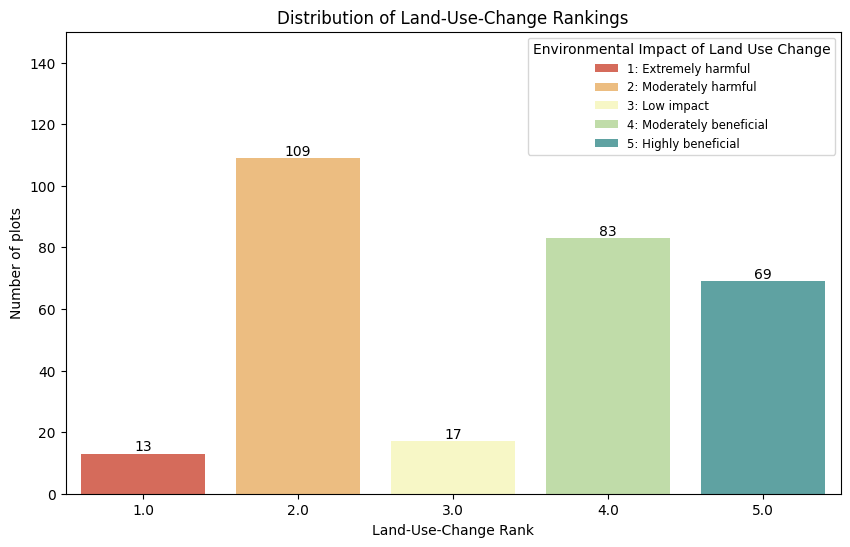

In [125]:
#Print a histogram of luc_rank
#First, remove NaN and convert luc_rank to a category 

df_luc_clean = df_luc_clean.dropna(subset=['luc_rank'])

df_luc_clean['luc_rank'] = df_luc_clean['luc_rank'].astype('float')

#df_luc_clean['luc_rank'] = df_luc_clean['luc_rank'].astype('category')

#Plot the histogram
palette = sns.color_palette("Spectral",5)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_luc_clean, x='luc_rank', palette=palette)
plt.title('Distribution of Land-Use-Change Rankings')
plt.xlabel('Land-Use-Change Rank')
plt.ylabel('Number of plots')
plt.ylim(0, 150)
# Add the number of observations in each rank
for i in range(5):
    count = df_luc_clean['luc_rank'].value_counts().sort_index().values[i]
    plt.text(i, count, count, ha='center', va='bottom')

plt.legend(title='Environmental Impact of Land Use Change',
           labels=['1: Extremely harmful', '2: Moderately harmful', '3: Low impact', '4: Moderately beneficial', '5: Highly beneficial'],
           fontsize='small', loc='upper right')

#Calculate and report skew
skew = df_luc_clean['luc_rank'].skew()
print(f"The skewness of the land use change rank distribution is: {skew}")

plt.show()



In [114]:
#Create a unique list of all land use change combinations (i.e. 'current_land_use* - 'previous_land_use*'

#Create a new dataframe that combines the strings in the 'LUC_this_study' and 'previous_land_use' columns into a new column called 'LUC type'"02_Data-Cleaning-Key-concepts (1).ipynb"

df['LUC type'] = df['previous_land_use*'] + ' -> ' + df['current_land_use*']

#Create a unique list of all land use change combinations (i.e. 'previous_land_use* - 'current_land_use*')
df['LUC type'].unique()

df['LUC type'].value_counts()




LUC type
grassland -> bioenergy             85
annual_crop -> bioenergy           66
annual_crop -> SRC                 61
natural_forest -> food             27
grassland -> SRC                   17
grassland -> food                  17
fallow -> SRC                       8
fallow -> food                      8
annual_crop -> food                 7
natural_forest -> SRC               6
natural_forest -> bioenergy         5
secondary_forest -> food            5
grassland -> livestockfood          4
perennial_food -> bioenergy         2
grassland -> bioproduct             2
secondary_forest -> bioenergy       2
annual_crop -> bioproduct           2
natural_forest -> livestockfood     1
SRC -> bioenergy                    1
secondary_forest -> SRC             1
Name: count, dtype: int64

We found 26 different unique land use change types. Now, we need to have a systematic way of ranking these land use change types.

There are also some acronyms that we need to define:

- SRC: short rotation coppice : planting of fast growing trees (usually willow or poplar, 2-8 year cycle) to be used for energy

In [115]:
#Do of the land use change types have similar plant species in common?

#Show a dataframe just containing the LUC type and the current crop type
df[['LUC type', 'CROP_current']]

#How many unique instances of there of each crop type within each LUC type?
df.groupby(['LUC type', 'CROP_current']).size()


LUC type                         CROP_current      
SRC -> bioenergy                 Miscanthus             1
annual_crop -> SRC               Acacia                 5
                                 Black_locust           1
                                 Eucalyptus             9
                                 Poplar                22
                                 Prosopis               1
                                 Spruce                 1
                                 Willow                21
                                 Woodlot                1
annual_crop -> bioenergy         Miscanthus            22
                                 Sugarcane              6
                                 Switchgrass           38
annual_crop -> bioproduct        Cotton                 2
annual_crop -> food              Almond                 2
                                 Banana                 1
                                 Cloves                 1
                    

In [116]:
#Find the most common crop type for each LUC type
df.groupby('LUC type')['CROP_current'].agg(pd.Series.mode)

LUC type
SRC -> bioenergy                         Miscanthus
annual_crop -> SRC                           Poplar
annual_crop -> bioenergy                Switchgrass
annual_crop -> bioproduct                    Cotton
annual_crop -> food                          Almond
fallow -> SRC                                Acacia
fallow -> food                               Almond
grassland -> SRC                             Willow
grassland -> bioenergy                    Sugarcane
grassland -> bioproduct                      Cotton
grassland -> food                            Coffee
grassland -> livestockfood                 Atriplex
natural_forest -> SRC                    Eucalyptus
natural_forest -> bioenergy               Sugarcane
natural_forest -> food                        Cocoa
natural_forest -> livestockfood          Brachiaria
perennial_food -> bioenergy               Sugarcane
secondary_forest -> SRC                  Eucalyptus
secondary_forest -> bioenergy              Jatropha
sec

Ranked based on biodiversity retention and carbon sequestration potential ​

Criteria for Ranking: ​

Carbon Sequestration Potential (CSP): High CSP would result in a higher score.​

Biodiversity Impact (BI): High biodiversity retention would also score higher.​

Each land use change type will get an index value based on these two factors. To simplify:​

5: Both CSP and BI are high (minimal harm, or positive change).​

4: Moderate CSP and BI are maintained.​

3: Either CSP or BI is compromised significantly.​

2: Both CSP and BI are moderately reduced.​

1: Both CSP and BI are heavily compromised.​


In [117]:

#Make a new dataframe called df_luc that replaces 'bioenergy', 'food', 'bioproduct', and 'livestockfood' with 'perrenial_crop'

df_luc = df.copy()

df_luc['current_land_use*'] = df_luc['current_land_use*'].apply(lambda x: 'perennial_crop' if x in ['bioenergy', 'food', 'bioproduct', 'livestockfood'] else x)
df_luc['previous_land_use*'] = df_luc['previous_land_use*'].apply(lambda x: 'perennial_crop' if x in ['bioenergy', 'food', 'bioproduct', 'livestockfood',] else x)

#Append the 'current_land_use*' column observations that are 'perennial_crop' with the CROP_type column observations

df_luc['current_land_use*'] = df_luc.apply(lambda x: 'perennial_' + x['CROP_type'] if x['current_land_use*'] == 'perennial_crop' else x['current_land_use*'], axis=1)

#Remove perennial_food from the dataset because we don't know the crop type so we don't know how to compare LUC where it was perennial_crop before and a different perennial crop now

df_luc = df_luc[df_luc['current_land_use*'] != 'perennial_food']
df_luc = df_luc[df_luc['previous_land_use*'] != 'perennial_food']

df_luc['LUC type'] = df_luc['previous_land_use*'] + ' -> ' + df_luc['current_land_use*']

df_luc['LUC type'].unique()

print(df_luc['LUC type'].value_counts())

def categorize_land_use(land_use):
        return land_use

# Create the dictionary with categorized land use types and their indices (CSP and BI combined)
land_use_indices = {
    categorize_land_use('perennial_woody'): (2, 2),
    categorize_land_use('fallow'): (1, 2),
    categorize_land_use('secondary_forest'): (4, 4),
    categorize_land_use('grassland'): (3, 3),
    categorize_land_use('natural_forest'): (5, 5),
    categorize_land_use('agrofor'): (3, 4),
    categorize_land_use('perennial_grass'): (2, 2),
    categorize_land_use('perennial_palm'): (2, 2),
    categorize_land_use('annual_crop'): (1, 1),
    categorize_land_use('SRC'): (3,2)
}

land_use_indices





LUC type
grassland -> perennial_grass           85
annual_crop -> perennial_grass         66
annual_crop -> SRC                     61
natural_forest -> perennial_woody      23
grassland -> perennial_woody           22
grassland -> SRC                       17
fallow -> perennial_woody               8
fallow -> SRC                           8
annual_crop -> perennial_woody          8
natural_forest -> perennial_grass       6
natural_forest -> SRC                   6
natural_forest -> perennial_palm        4
secondary_forest -> perennial_woody     4
secondary_forest -> perennial_palm      3
annual_crop -> perennial_palm           1
grassland -> perennial_palm             1
SRC -> perennial_grass                  1
secondary_forest -> SRC                 1
Name: count, dtype: int64


{'perennial_woody': (2, 2),
 'fallow': (1, 2),
 'secondary_forest': (4, 4),
 'grassland': (3, 3),
 'natural_forest': (5, 5),
 'agrofor': (3, 4),
 'perennial_grass': (2, 2),
 'perennial_palm': (2, 2),
 'annual_crop': (1, 1),
 'SRC': (3, 2)}

In [118]:
#Assign the previous and current land use indices to each row in the dataframe

#Drop any rows with missing values in the 'previous_land_use*' and 'current_land_use*' columns
df_luc = df_luc.dropna(subset=['previous_land_use*', 'current_land_use*'])

df_luc['previous_land_use_index'] = df_luc['previous_land_use*'].apply(lambda x: land_use_indices[categorize_land_use(x)])
df_luc['current_land_use_index'] = df_luc['current_land_use*'].apply(lambda x: land_use_indices[categorize_land_use(x)])

print(df.head())


   Unnamed: 0  ID  IDstudy  plotID     country         region    climate  \
0           0   1        1       1      Brazil       SaoPaulo   Tropical   
1           1   5        1       2      Brazil       SaoPaulo   Tropical   
2           2   9        1       3      Brazil       SaoPaulo   Tropical   
3           3  13        1       4      Brazil       SaoPaulo   Tropical   
4           4  26        4       8  New_Zeland  Bay_of_Plenty  Temperate   

     bedrock       soil_type TYPE_CHANGE  ... depth_midpoint_previous  \
0  Sandstone      Ferralsols         LUC  ...               20.000000   
1  Sandstone         Luvisol         LUC  ...               20.000000   
2    Granite      Ferralsols         LUC  ...               20.000000   
3  Sandstone         Luvisol         LUC  ...               20.000000   
4   Volcanic  Mollic_Andosol         LUC  ...                3.754545   

  Bulkdensity_previous %clay_previous %silt_previous %sand_previous  \
0             1.450000      21.90

In [119]:
#Based on these indexes, rank the land use change from most to least sustainable, by calculating csp change and bi change

#Based on these indexes, rank the land use change from most to least sustainable, by calculating csp change and bi change

#Unpack the tuple in the 'previous_land_use_index' and 'current_land_use_index' columns into separate columns
df_luc['previous_CSP_index'] = df_luc['previous_land_use_index'].apply(lambda x: x[0])
df_luc['previous_BI_index'] = df_luc['previous_land_use_index'].apply(lambda x: x[1])
df_luc['current_CSP_index'] = df_luc['current_land_use_index'].apply(lambda x: x[0])
df_luc['current_BI_index'] = df_luc['current_land_use_index'].apply(lambda x: x[1])

# Calculate the csp change and bi change for each row
df_luc['csp_change'] = df_luc['current_CSP_index'] - df_luc['previous_CSP_index']  # Positive values indicate an increase in CSP
df_luc['bi_change'] = df_luc['current_BI_index'] - df_luc['previous_BI_index']  # Positive values indicate an increase in BI





In [120]:
#Let's try a different formulation for calcualtion the rank of land use change
# Define a function to rank land use change based on combined CSP and BI changes

def rank_land_use_change(csp_change, bi_change):
    #If both increase in csp and bi, and either increases by more than 1, the land use change is ranked as 5
    if csp_change > 0 and bi_change > 0 and (csp_change > 1 or bi_change > 1):
        return 5
    #If both increase in csp and bi, but neither increases by more than 1, the land use change is ranked as 4
    elif csp_change > 0 and bi_change > 0 and (csp_change <= 1 and bi_change <= 1):
        return 4
    #If csp and bi stay the same, or if one increases by and the other stays the same,
    # or if one decreases and the other stays the same, the land use change is ranked as 3
    elif (csp_change == 0 and bi_change == 0) or (csp_change >= 0 and bi_change == 0) or (csp_change == 0 and bi_change >= 0) or (csp_change == -1 and bi_change == 0) or (csp_change == 0 and bi_change == -1):
        return 3
    #If one increases by 1 and the other decreases by 1, the land use change is ranked as 3
    elif (csp_change == 1 and bi_change == -1) or (csp_change == -1 and bi_change == 1):
        return 3
    #If both decrease, but neither decreases by more than 1, the land use change is ranked as 2
    elif csp_change < 0 and bi_change < 0 and (csp_change >= -1 and bi_change >= -1):
        return 2
    #If both decrease, and either decreases by more than 1, the land use change is ranked as 1
    elif csp_change < 0 and bi_change < 0 and (csp_change < -1 or bi_change < -1):
        return 1


# Apply the function to rank the land use change
df_luc['land_use_change_rank'] = df_luc.apply(lambda x: rank_land_use_change(x['csp_change'], x['bi_change']), axis=1)

# Display the updated dataframe with the land use change rank
df_luc.head()

#df_luc.groupby('LUC type')['land_use_change_rank'].unique().sort_values(ascending=False)

,Unnamed: 0,ID,IDstudy,plotID,country,region,climate,bedrock,soil_type,TYPE_CHANGE,...,LUC type,previous_land_use_index,current_land_use_index,previous_CSP_index,previous_BI_index,current_CSP_index,current_BI_index,csp_change,bi_change,land_use_change_rank
2,2,9,1,3,Brazil,SaoPaulo,Tropical,Granite,Ferralsols,LUC,...,annual_crop -> perennial_grass,"(1, 1)","(2, 2)",1,1,2,2,1,1,4
3,3,13,1,4,Brazil,SaoPaulo,Tropical,Sandstone,Luvisol,LUC,...,grassland -> perennial_grass,"(3, 3)","(2, 2)",3,3,2,2,-1,-1,2
4,4,26,4,8,New_Zeland,Bay_of_Plenty,Temperate,Volcanic,Mollic_Andosol,LUC,...,grassland -> perennial_woody,"(3, 3)","(2, 2)",3,3,2,2,-1,-1,2
5,5,61,6,15,Germany,Ihinger_Hof,Temperate,NaN,Haplic_Luvisol,LUC,...,annual_crop -> perennial_grass,"(1, 1)","(2, 2)",1,1,2,2,1,1,4
6,6,62,6,16,Germany,Ihinger_Hof,Temperate,NaN,Haplic_Luvisol,LUC,...,annual_crop -> perennial_grass,"(1, 1)","(2, 2)",1,1,2,2,1,1,4


C:\Users\defrang\AppData\Local\Temp\ipykernel_25444\294663727.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




The skewness of the land use change rank distribution is: 0.12754241907479463


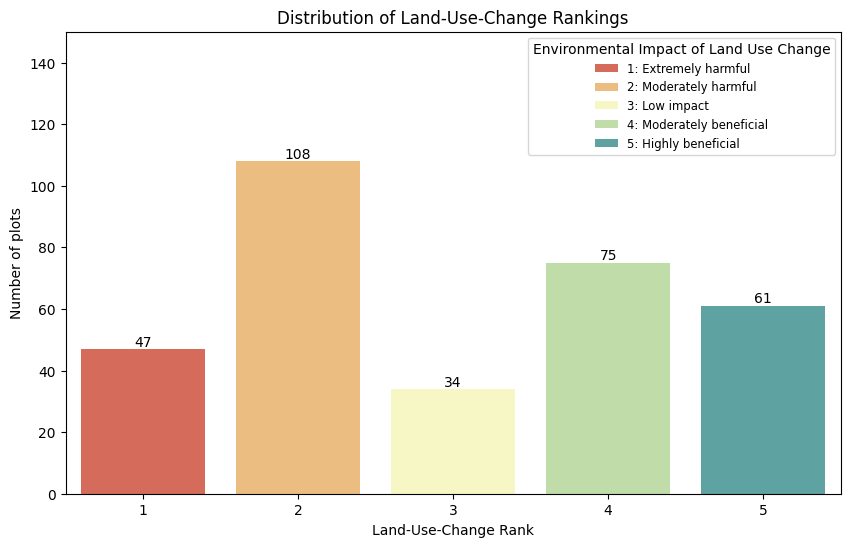

In [124]:
# Plot the distribution of land use change ranks
# palette should go be dark and muted, from a deep orange to a deep turquoise, passing through a neutral yellow


palette = sns.color_palette("Spectral",5)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_luc, x='land_use_change_rank', palette=palette)
plt.title('Distribution of Land-Use-Change Rankings')
plt.xlabel('Land-Use-Change Rank')
plt.ylabel('Number of plots')
plt.ylim(0, 150)
# Add the number of observations in each rank
for i in range(5):
    count = df_luc['land_use_change_rank'].value_counts().sort_index().values[i]
    plt.text(i, count, count, ha='center', va='bottom')

plt.legend(title='Environmental Impact of Land Use Change',
           labels=['1: Extremely harmful', '2: Moderately harmful', '3: Low impact', '4: Moderately beneficial', '5: Highly beneficial'],
           fontsize='small', loc='upper right')

#Calculate and report skew
skew = df_luc['land_use_change_rank'].skew()
print(f"The skewness of the land use change rank distribution is: {skew}")

plt.show()

In [127]:
print(df_luc)

     Unnamed: 0    ID  IDstudy  plotID     country         region    climate  \
2             2     9        1       3      Brazil       SaoPaulo   Tropical   
3             3    13        1       4      Brazil       SaoPaulo   Tropical   
4             4    26        4       8  New_Zeland  Bay_of_Plenty  Temperate   
5             5    61        6      15     Germany    Ihinger_Hof  Temperate   
6             6    62        6      16     Germany    Ihinger_Hof  Temperate   
..          ...   ...      ...     ...         ...            ...        ...   
429         429  1563      179     703       India         Karnal   Tropical   
430         430  1570      179     704       India         Karnal   Tropical   
431         431  1577      179     705       India         Karnal   Tropical   
432         432  1584      179     706       India         Karnal   Tropical   
433         433  1591      179     707       India         Karnal   Tropical   

       bedrock         soil_type TYPE_C

There is a potential to get more nuanced with this by accounting for crop type and fertilizer

In [ ]:
#Make a choropleth of land use change rank by country

#Group the data by country and calculate the average land use change rank to two decimal places

country_rank = df_luc.groupby('country')['land_use_change_rank'].mean().round(2).reset_index()

fig = px.choropleth(country_rank, locations='country', locationmode='country names', color='land_use_change_rank',
                    color_continuous_scale='geyser_r',
                    range_color = [1, 5],

                    title='Average Land-Use-Change Rank by Country')
fig.update_layout(coloraxis_colorbar=dict(title='Land Use Change Rank'))
fig.update_layout(coloraxis_colorbar=dict(title='Land Use Change Rank', len=0.5))


fig.show()

#Save the figure as an HTML file and save it to the current working directory

if SAVE_HTML: 
    fig.write_html('land_use_change_rank_by_country.html')

#Save the figure as a PNG file and save it to the current working directory
if SAVE_FIGS:
    fig.write_image('land_use_change_rank_by_country.png')



In [ ]:
#Let's see what variables are the best predictors of the SOC_change_category variable
#We will use a Decision Tree Classifier for this

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

#Drop the columns that are not needed
df = df.drop(['SOC_Mg_ha_previous', 'SOC_Mg_ha_current', 'log_SOC_Mg_ha_previous', 'log_SOC_Mg_ha_current', 'SOC_change'], axis=1)

#Drop rows with missing values
df = df.dropna()

#Encode the categorical variables
le = LabelEncoder()
df['country'] = le.fit_transform(df['country'])
df['current_land_use*'] = le.fit_transform(df['current_land_use*'])
df['SOC_change_category'] = le.fit_transform(df['SOC_change_category'])

#Split the data into training and testing sets
X = df.drop('SOC_change_category', axis=1)
y = df['SOC_change_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

#Make predictions
y_pred = clf.predict(X_test)

#Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

#Check the feature importances
importances = clf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.title('Feature Importances')
plt.show()
